In [1]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

In [ ]:
# 비디오
# Normal 비디오의 아무 세그먼트
# Anomaly 비디오의 non-anomaly 세그먼트
# Anomaly 비디오의 anomaly 세그먼트

# 텍스트
# normal 텍스트
# anomaly 텍스트

In [3]:
p_embeddings_rootdir = Path('/code/output/psuedo-captions/gpt-4o/00-rich-context/embeddings/dur=1.0_ol=0.5_fs=16/segments')
all_p_normals = {}
embeddings_normal = []
for p_normal_dir in (p_embeddings_rootdir / 'Normal').glob('*'):
    p_embeddings = sorted(list(p_normal_dir.glob('*.npy')), key=lambda x: int(x.stem))
    embeddings_normal.append(np.load(p_embeddings[len(p_embeddings)//2]))
    key = f'Normal/{p_normal_dir.name}'
    all_p_normals[key] = p_embeddings
embeddings_normal = np.array(embeddings_normal)

all_p_anomalies = {}
embeddings_anomaly = []
for p_embeddings_class_dir in p_embeddings_rootdir.glob('*'):
    if p_embeddings_class_dir.name == 'Normal':
        continue
    for p_video_dir in p_embeddings_class_dir.glob('*'):
        p_embeddings = sorted(list(p_video_dir.glob('*.npy')), key=lambda x: int(x.stem))
        embeddings_anomaly.append(np.load(p_embeddings[len(p_embeddings)//2]))
        key = f'{p_embeddings_class_dir.name}/{p_video_dir.name}'
        all_p_anomalies[key] = p_embeddings
embeddings_anomaly = np.array(embeddings_anomaly)

In [4]:
p_embedding_text_normal = Path('/code/output/psuedo-captions/gpt-4o/00-rich-context/embs_normal.npy')
p_embedding_text_anomaly = Path('/code/output/psuedo-captions/gpt-4o/00-rich-context/embs_anomalous.npy')
embeddings_text_normal = np.load(p_embedding_text_normal)[:1000]
embeddings_text_anomaly = np.load(p_embedding_text_anomaly)[:1000]

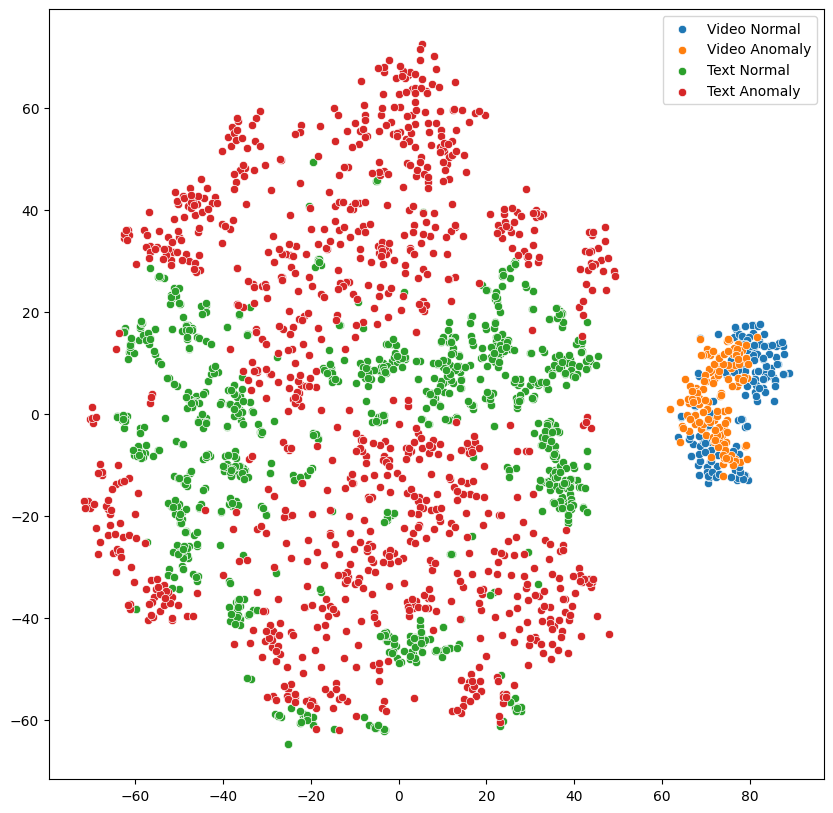

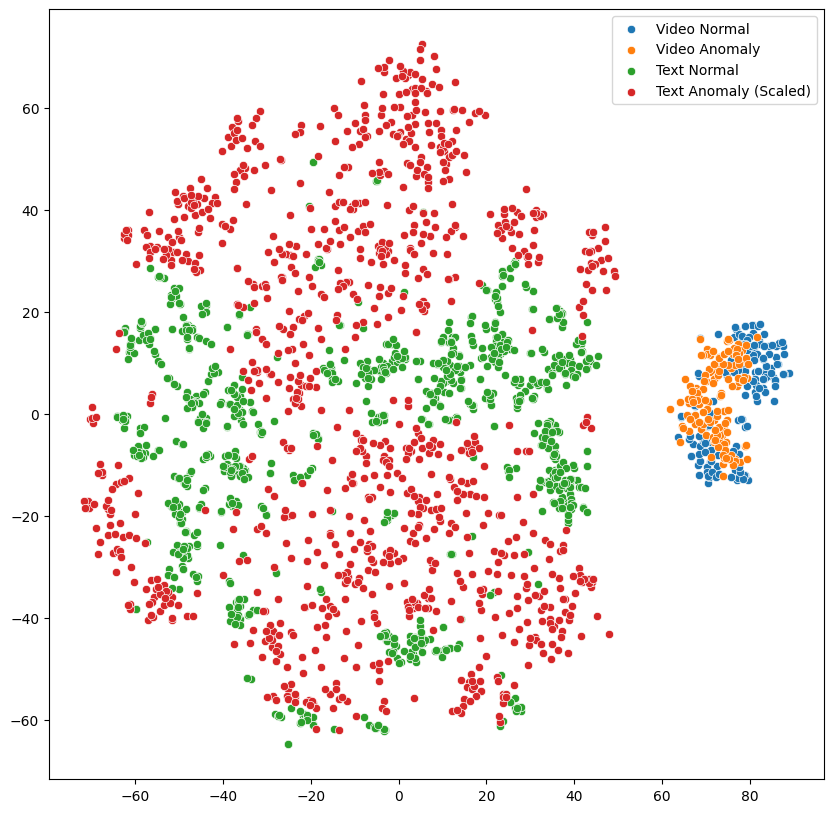

In [ ]:
np.random.seed(0)
# tsne = TSNE(n_components=2, perplexity=30, max_iter=1000, init='random', metric='precomputed')
tsne = TSNE(n_components=2, perplexity=30, max_iter=1000, init='pca', metric='cosine')
e = np.concatenate([
    embeddings_normal,
    embeddings_anomaly,
    embeddings_text_normal,
    .01 * embeddings_text_anomaly,
    .01 * embeddings_text_anomaly * .8], axis=0)
ee = tsne.fit_transform(e)
# dot = np.dot(e, e.T)
# ee = tsne.fit_transform(dot.max() - dot)

a, b, c, d = len(embeddings_normal), len(embeddings_anomaly), len(embeddings_text_normal), len(embeddings_text_anomaly)
bdds = [a, a+b, a+b+c, a+b+c+d]

plt.figure(figsize=(10, 10))
sns.scatterplot(x=ee[:bdds[0], 0], y=ee[:bdds[0], 1], label='Video Normal')
sns.scatterplot(x=ee[bdds[0]:bdds[1], 0], y=ee[bdds[0]:bdds[1], 1], label='Video Anomaly')
sns.scatterplot(x=ee[bdds[1]:bdds[2], 0], y=ee[bdds[1]:bdds[2], 1], label='Text Normal')
sns.scatterplot(x=ee[bdds[2]:bdds[3], 0], y=ee[bdds[2]:bdds[3], 1], label='Text Anomaly')
plt.legend()
plt.show()

# plt.figure(figsize=(10, 10))
# sns.scatterplot(x=ee[:bdds[0], 0], y=ee[:bdds[0], 1], label='Video Normal')
# sns.scatterplot(x=ee[bdds[0]:bdds[1], 0], y=ee[bdds[0]:bdds[1], 1], label='Video Anomaly')
# sns.scatterplot(x=ee[bdds[1]:bdds[2], 0], y=ee[bdds[1]:bdds[2], 1], label='Text Normal')
# sns.scatterplot(x=ee[bdds[3]:, 0], y=ee[bdds[3]:, 1], label='Text Anomaly (Scaled)')
# plt.legend()
# plt.show()

/opt/conda/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


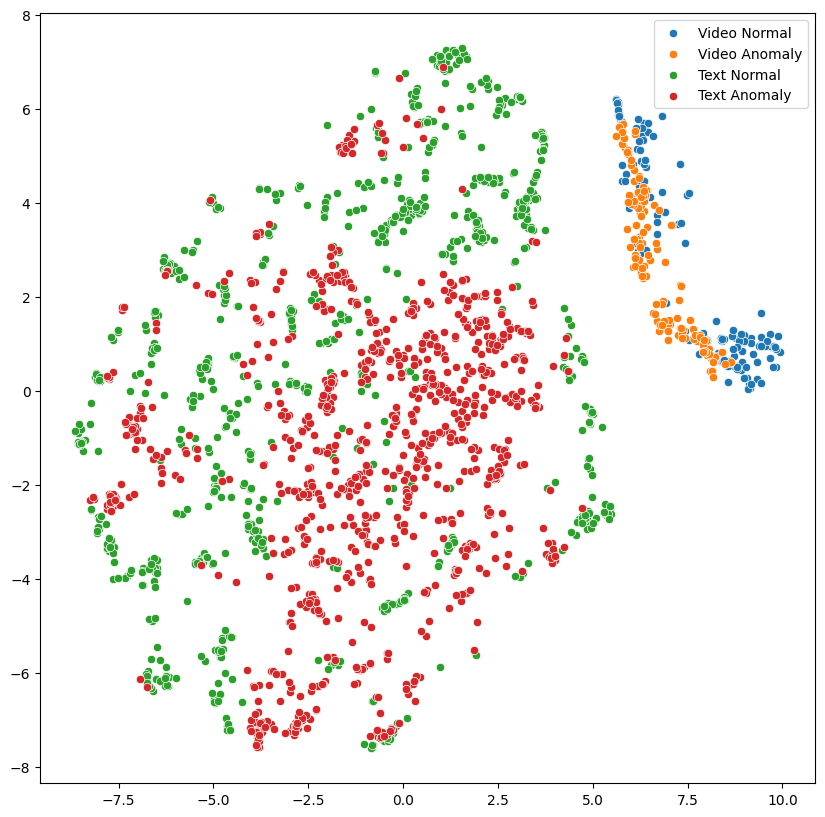

In [ ]:
np.random.seed(0)
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, metric='cosine')
e = np.concatenate([embeddings_normal, embeddings_anomaly, embeddings_text_normal, .8*embeddings_text_anomaly], axis=0)
ee = tsne.fit_transform(e)

plt.figure(figsize=(10, 10))
a, b, c = len(embeddings_normal), len(embeddings_anomaly), len(embeddings_text_normal)
bdds = [a, a+b, a+b+c]
sns.scatterplot(x=ee[:bdds[0], 0], y=ee[:bdds[0], 1], label='Video Normal')
sns.scatterplot(x=ee[bdds[0]:bdds[1], 0], y=ee[bdds[0]:bdds[1], 1], label='Video Anomaly')
sns.scatterplot(x=ee[bdds[1]:bdds[2], 0], y=ee[bdds[1]:bdds[2], 1], label='Text Normal')
sns.scatterplot(x=ee[bdds[2]:, 0], y=ee[bdds[2]:, 1], label='Text Anomaly')
plt.legend()
plt.show()